<a href="https://colab.research.google.com/github/niri-sky/occular_disease_recognition/blob/irina/glaucoma_retinopathy_no_filter_SVM_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Glaucoma Detection


# Importing Libraries


In [18]:
import numpy as np
from scipy import misc
from PIL import Image
from skimage import exposure
from sklearn import svm
import scipy.signal
from skimage.exposure import rescale_intensity
import argparse
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import scipy
from math import sqrt,pi
from numpy import exp
import glob
import matplotlib.pyplot as pltss
import cv2
from matplotlib import cm
import pandas as pd
from math import pi, sqrt
import pywt
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Importing image files

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
eye_glaucoma = !unzip /content/gdrive/MyDrive/galucoma.zip
eye_normal= !unzip /content/gdrive/MyDrive/cleaned_eye_images/normal.zip


### Setting random seed for reproducibility:


In [4]:
np.random.seed(42)

#### Loading images and saving as an array:

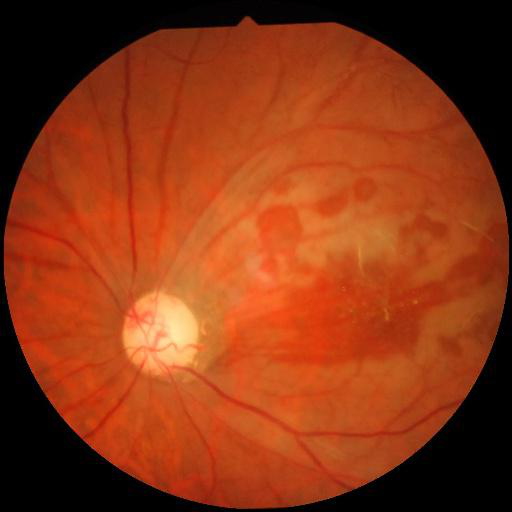

In [5]:
glaucoma = load_img('/content/gdrive/MyDrive/glaucoma/1020_left_cleaned.jpg')
glaucoma

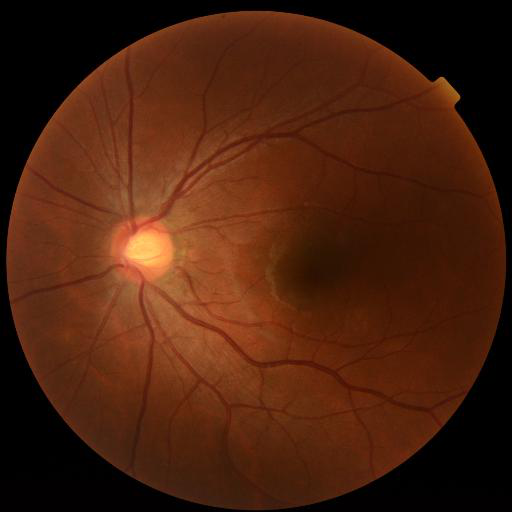

In [6]:
normal = load_img('gdrive/MyDrive/cleaned_eye_images/normal/NL_001_cleaned.jpg')
normal

### Loading glaucoma and normal images, labeling them, converting to array and creating a target column:

In [12]:
Categories=['glaucoma','normal']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/gdrive/MyDrive/cleaned_eye_images/' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : glaucoma
loaded category:glaucoma successfully
loading... category : normal
loaded category:normal successfully


# SVM model

#### Instantiating support vector machine with the grid search parameters:

In [13]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

#### Train test split and fitting the model:

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


#### Predicting outcomes and calculating accuracy score:

In [15]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1
 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0]
The actual data is:
[1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1
 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0]
The model is 85.3146853146853% accurate


#### Creating classification report:

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        83
           1       0.78      0.90      0.84        60

    accuracy                           0.85       143
   macro avg       0.85      0.86      0.85       143
weighted avg       0.86      0.85      0.85       143



We see that the f1-score for both categories is close.

#### Calculating accuracy score for the test data:

In [20]:
accuracy_score(y_test, y_pred)

0.8531468531468531

#### Calculating accuracy score for the train data:

In [22]:
train_preds = model.predict(x_train)
accuracy_score(y_train, train_preds)

1.0

We see that the model is overfit since the accuracy score for the train data is much higher than for the test data.

# KNN model

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
        ('sc', StandardScaler()),     
        ('knn', KNeighborsClassifier(algorithm='brute')) 
    ])
params = {
        'knn__n_neighbors': [3, 5, 7, 9, 11] 
    }
clf = GridSearchCV(estimator=pipe,           
                      param_grid=params, 
                      cv=5,
                      return_train_score=True) 
clf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='brute',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             i

In [25]:
# print best parameter after tuning
print(clf.best_params_)

{'knn__n_neighbors': 7}


In [26]:
# print how our model looks after hyper-parameter tuning
print(clf.best_estimator_)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)


#### Making predictions:

In [28]:
grid_predictions_knn = clf.predict(x_test)

#### Printing classification report:

In [30]:
print(classification_report(y_test, grid_predictions_knn))

              precision    recall  f1-score   support

           0       0.93      0.65      0.77        83
           1       0.66      0.93      0.77        60

    accuracy                           0.77       143
   macro avg       0.79      0.79      0.77       143
weighted avg       0.82      0.77      0.77       143



We see that eventhough the f1-score for KNN model is lower than for the SVM, the model is not overfit.

# Diabetic Retinopathy Detection

#### Loading images and saving them as an array

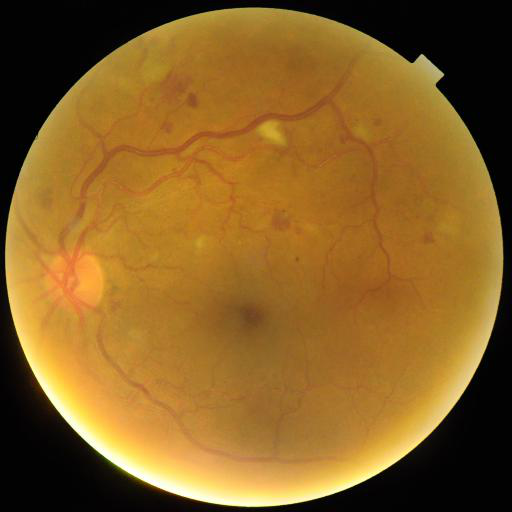

In [41]:
diabetic = load_img('/content/gdrive/MyDrive/cleaned_eye_images/retinopathy/101_cleaned.jpg')
diabetic

In [42]:
Categories=['retinopathy','normal']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/gdrive/MyDrive/cleaned_eye_images/' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : retinopathy
loaded category:retinopathy successfully
loading... category : normal
loaded category:normal successfully


# SVM model

#### Instantiating support vector machine with the grid search parameters:

In [43]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

#### Train test split and fitting the model:

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


#### Predicting outcomes and calculating accuracy score:

In [45]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1
 0 0 0 0 1 1 1 1]
The actual data is:
[0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1
 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1
 0 1 0 1 1 1 1 0]
The model is 88.46153846153845% accurate


#### Creating classification report:

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90        96
           1       0.78      0.97      0.87        60

    accuracy                           0.88       156
   macro avg       0.88      0.90      0.88       156
weighted avg       0.90      0.88      0.89       156



#### Calculating accuracy score for the test data:

In [47]:
accuracy_score(y_test, y_pred)

0.8846153846153846

#### Calculating accuracy score for the train data:

In [48]:
train_preds = model.predict(x_train)
accuracy_score(y_train, train_preds)

0.9548387096774194

We see that the model is slightly overfit, but overall, the accuracy is good.

# KNN model

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
        ('sc', StandardScaler()),     
        ('knn', KNeighborsClassifier(algorithm='brute')) 
    ])
params = {
        'knn__n_neighbors': [3, 5, 7, 9, 11] 
    }
clf = GridSearchCV(estimator=pipe,           
                      param_grid=params, 
                      cv=5,
                      return_train_score=True) 
clf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='brute',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             i

In [50]:
# print best parameter after tuning
print(clf.best_params_)

{'knn__n_neighbors': 11}


In [ ]:
# print how our model looks after hyper-parameter tuning
print(clf.best_estimator_)

#### Making predictions:

In [51]:
grid_predictions_knn = clf.predict(x_test)

#### Printing classification report:

In [52]:
print(classification_report(y_test, grid_predictions_knn))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88        96
           1       0.75      0.97      0.85        60

    accuracy                           0.87       156
   macro avg       0.86      0.88      0.86       156
weighted avg       0.89      0.87      0.87       156



KNN performed slightly worse, but it is not overfit.

# References:
1. A guide for using the Wavelet Transform in Machine Learning: https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/
2.Wavelet transforms with Python: https://pywavelets.readthedocs.io/en/latest/
3. Image Processing: https://medium.com/journey-to-machine-learning-deep-learning/chapter-five-image-processing-e5b92ee87c0b
4. Convolutions with Python and OpenCV: https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/
5. Kernel filter: https://en.wikipedia.org/wiki/Kernel_(image_processing)
6. OpenCV K-means clustering: https://docs.opencv.org/4.5.2/d5/d38/group__core__cluster.html